**Authors:** Jozef Hanč, Martina Hančová  <br> *[Faculty of Science](https://www.upjs.sk/en/faculty-of-science/?prefferedLang=EN), P. J. Šafárik University in Košice, Slovakia* <br> emails: [martina.hancova@upjs.sk](mailto:martina.hancova@upjs.sk)
***

# <font color = brown, size=6> $\mathcal{GDD}$ pdf convolution integral</font>

# Built-in automatic numerical integration procedures - default precision

<font size=4> Computational tools: </font>  **<font size=4>Pari, Sage, SciPy, Cython</font>**  

In [1]:
N = 4 #test up to 10^N pdf values

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

from numpy import inf as INF
v = lambda LIST: vector(LIST)
from time import time

import math, cmath
import scipy

# approximate formulas for precisions expressed in bits and decimal places
bits = lambda d:round((d+1)*ln(10)/ln(2)) 
dps = lambda b:round(b*ln(2)/ln(10) - 1)

# accuracy in Python
def abs_errs(df1, df2):
    N = len(df1)
    errors = [abs(df1[i]-df2[i]) for i in range(N)]
    return errors

ver = installed_packages()
tools = ['sagelib', 'scipy', 'mpmath', 'numpy', 'cython', 'matplotlib', 'pari']
vers = {tool:ver[tool] for tool in tools}
vers

{'sagelib': '9.2',
 'scipy': '1.5.2',
 'mpmath': '1.1.0',
 'numpy': '1.19.1',
 'cython': '0.29.21',
 'matplotlib': '3.3.1',
 'pari': '2.11.4.p0'}

## $\mathcal{GDD}$ pdf  $-$ analytic expression

$
f(z)=
\dfrac{\beta_{1}^{\alpha_{1}} \beta_{2}^{\alpha_{2}}}{\beta^{\alpha-1}}
\begin{cases}
{\dfrac{e^{z \beta_{2}}}{\Gamma\left(\alpha_{2}\right)} U\left(1-\alpha_{2}, 2-\alpha,-z \beta\right),} & {z<0} \\[12pt]
\begin{array}{cc} 
\frac{\Gamma(\alpha-1)}{\beta^{a / 2-1} \Gamma\left(\alpha_{1}\right) \Gamma\left(\alpha_{2}\right)}, & \scriptstyle 1<\alpha \\ 
\infty,  & \scriptstyle 0<\alpha \leq 1 
\end{array}, & z=0 \\[12pt] 
{\dfrac{e^{-z \beta_{1}}}{\Gamma\left(\alpha_{1}\right)} U\left(1-\alpha_{1}, 2-\alpha, z \beta\right),} & {z>0}
\end{cases}
$


$\alpha=\alpha_{1}+\alpha_{2}, \quad \beta=\beta_{1}+\beta_{2}$

In [2]:
# pre-calulated analytic results from mpmath, Pari GP and Arb
dpari = {str(10**(n+1)):np.loadtxt('data/Pari_Sage_pdf'+str(10**(n+1))+'.txt', delimiter=',',
                                   dtype=np.longdouble) for n in range(N)}
dx = {str(10**(n+1)):np.loadtxt('data/xvalues'+str(10**(n+1))+'.txt', dtype=np.longdouble) for n in range(N)}

# Pdf as a convolution integral
<div style="display:none">
$
 \newcommand{\a}{\alpha}
 \newcommand{\b}{\beta}
 \newcommand{\cft}{\varphi(t)}
  \newcommand{\Rv}[1]{\mathscr{R}^{#1}}
$
</div>

$
f(z)=
\dfrac{\beta_{1}^{\alpha_{1}} \beta_{2}^{\alpha_{2}}}{\Gamma\left(\alpha_{1}\right) \Gamma\left(\alpha_{2}\right)}
\begin{cases}
{e^{-\beta_{1} z} \displaystyle \int_{-z}^{\infty} x^{\alpha_{2}-1}(x+z)^{\alpha_{1}-1} e^{-\beta x} d x,} & {z<0} \\[12pt]
\begin{array}{cc} 
\frac{\Gamma(\alpha-1)}{\beta^{a-1}}, & \scriptstyle 1<\alpha \\ 
\infty,  & \scriptstyle 0<\alpha \leq 1 
\end{array}, & z=0 \\[12pt] 
{e^{\beta_{2} z} \displaystyle \int_{z}^{\infty} x^{\alpha_{1}-1}(x-z)^{\alpha_{2}-1} e^{-\beta x} d x,} & {z>0}
\end{cases}
$

$\alpha=\alpha_{1}+\alpha_{2}, \quad \beta=\beta_{1}+\beta_{2}$

## Sage $-$ GLS library

In [3]:
eps = 1e-15
a1, b1 = 0.5, 1.0
a2, b2 = 8.5, 93.0
a, b = a1+a2, b1+b2
c = b1^a1*b2^a2/gamma(a1)/gamma(a2)
gls_kwargs = {} #{'eps_rel': eps, 'eps_abs':eps, 'max_points':1000}

# defining f(z) 53-bit
fm = lambda z: numerical_integral(c*exp(-z*b1)*x**(a2-1)*(x+z)**(a1-1)*exp(-b*x), -z, oo,**gls_kwargs)[0] 
f0 = lambda z: c*gamma(a-1)/b**(a-1) if a>1 else oo
fp = lambda z: numerical_integral(c*exp(z*b2)*x**(a1-1)*(x-z)**(a2-1)*exp(-b*x), z, oo,**gls_kwargs)[0] 

fsage = lambda z: fp(z) if z > 0 else fm(z) if z < 0 else f0(z)

In [4]:
A1, B1 = QQ(a1), QQ(b1)
A2, B2 = QQ(a2), QQ(b2)
A, B = A1+A2, B1+B2
C = B1^A1*B2^A2/gamma(A1)/gamma(A2)

# defining f(z) Sage
fmS = lambda z: numerical_integral(C*exp(-z*B1)*x**(A2-1)*(x+z)**(A1-1)*exp(-B*x), -z, oo,**gls_kwargs)[0] 
f0S = lambda z: (C*gamma(A-1)/B**(A-1)).n() if a>1 else oo
fpS= lambda z: numerical_integral(C*exp(z*B2)*x**(A1-1)*(x-z)**(A2-1)*exp(-B*x), z, oo,**gls_kwargs)[0] 

fSage = lambda z: fpS(z) if z > 0 else fmS(z) if z < 0 else f0S(z)

In [5]:
# defining f(z) Sage fast float
f0f = lambda: (C*gamma(A-1)/B**(A-1)).n() if a>1 else oo

gm(z,x) = C*exp(-z*B1)*x**(A2-1)*(x+z)**(A1-1)*exp(-B*x); gmf = fast_float(gm(z,x),z,x)
fmf = lambda z: numerical_integral(lambda x:gmf(z,x), -z, oo,**gls_kwargs)[0] 

gp(z,x) = C*exp(z*B2)*x**(A1-1)*(x-z)**(A2-1)*exp(-B*x); gpf = fast_float(gp(z,x), z, x)
fpf = lambda z: numerical_integral(lambda x:gpf(z,x), z, oo,**gls_kwargs)[0] 

fsagef = lambda z: fpf(z) if z > 0 else fmf(z) if z < 0 else f0f()

In [6]:
gm(-0.1, 0.15).n(), gmf(-0.1, 0.15), gp(0.1, 0.15).n(), gpf(0.1, 0.15)

(5.33842006763106, 5.3384200676310565, 8.05289321431687, 8.052893214316866)

In [7]:
fpf(1)

0.18154352175633093

In [8]:
sageval = fSage(1), fsage(1), fsagef(1)
sageval

(0.1815435217563309, 0.18154352175633093, 0.18154352175633093)

## SciPy

In [9]:
# importing scientific python library for fast computing
import scipy.special as sp
from scipy.integrate import quad

In [10]:
cs = b1**a1*b2**a2/(sp.gamma(a1)*sp.gamma(a2))
sci_kwargs = {} #{'epsabs':eps, 'epsrel':eps, 'limit':1000}

# defining f(z)
fms = lambda z: quad(lambda x:c*math.exp(-z*b1)*x**(a2-1)*(x+z)**(a1-1)*math.exp(-b*x), -z, oo,**sci_kwargs)[0] 
f0s = lambda z: c*sp.gamma(a-1)/b**(a-1) if a>1 else oo
fps = lambda z: quad(lambda x: c*math.exp(z*b2)*x**(a1-1)*(x-z)**(a2-1)*math.exp(-b*x), z, oo,**sci_kwargs)[0] 

fsci = lambda z: fps(z) if z > 0 else fms(z) if z < 0 else f0s(z)

In [11]:
fsci(1)

0.181543521756319

## Cython

In [12]:
%load_ext Cython

In [13]:
%%cython
cimport scipy.special.cython_special as cs
cimport libc.math as lc
from numpy.math cimport INFINITY
from scipy.integrate import quad 

def fmcy(double x, double z, double a1, double a2, double b1, double b2):
    cdef:
        double a = a1+a2
        double b = b1+b2
        double c = lc.pow(b1,a1)*lc.pow(b2,a2)/cs.gamma(a1)/cs.gamma(a2)
       
    return c*lc.exp(-z*b1)*lc.pow(x,a2-1)*lc.pow(x+z,a1-1)*lc.exp(-b*x) 
    

def fpcy(double x, double z, double a1, double a2, double b1, double b2):
    cdef:
        double a = a1+a2
        double b = b1+b2
        double c = lc.pow(b1,a1)*lc.pow(b2,a2)/cs.gamma(a1)/cs.gamma(a2)
  
    return c*lc.exp(z*b2)*lc.pow(x,a1-1)*lc.pow(x-z,a2-1)*lc.exp(-b*x)
    
def f0cy(double a1, double a2, double b1, double b2):
    cdef:
        double a = a1+a2
        double b = b1+b2
        double c = lc.pow(b1,a1)*lc.pow(b2,a2)/cs.gamma(a1)/cs.gamma(a2)
        double d = c*cs.gamma(a-1)/lc.pow(b, a-1)
    
    if a<1: value = d
    else: value = INFINITY
    return value

In [14]:
def fcys(z):
    if z>0: 
        value = quad(lambda x: fpcy(x,z,a1,a2,b1,b2), z, oo, **sci_kwargs)[0]
    elif z<0:
        value = quad(lambda x: fmcy(x,z,a1,a2,b1,b2), -z, oo, **sci_kwargs)[0]
    else:
        value = f0cy(a1,a2, b1, b2)
    return value

def fcyg(z):
    if z>0: 
        value = numerical_integral(lambda x: fpcy(x,z,a1,a2,b1,b2), z, oo, **gls_kwargs)[0]
    elif z<0:
        value = numerical_integral(lambda x: fmcy(x,z,a1,a2,b1,b2), -z, oo, **gls_kwargs)[0]
    else:
        value = f0cy(a1,a2, b1, b2)
    return value

In [15]:
values = fcyg(1), fcys(1)
values

(0.18154352175633098, 0.18154352175631905)

## Pilot test

In [16]:
pdf = {'Sage': fSage, 'sage 53': fsage, 'sci':fsci, 'sage ff': fsagef, 'sci-cy': fcys, 'gls-cy':fcyg}

In [17]:
t = 0.56
runtimes = []
for key, fun in pdf.items():
    print(key, type(fun(t)), 'f('+str(t)+')=', fun(t))
    rt = %timeit -r 1 -n 10 -oq fun(t)
    runtimes += [rt.average]
    %timeit -r 3 -n 10 fun(t)
    print('')

Sage <class 'float'> f(0.560000000000000)= 0.365175683755502
13.6 ms ± 233 µs per loop (mean ± std. dev. of 3 runs, 10 loops each)

sage 53 <class 'float'> f(0.560000000000000)= 0.365175683755502
12.1 ms ± 306 µs per loop (mean ± std. dev. of 3 runs, 10 loops each)

sci <class 'float'> f(0.560000000000000)= 0.3651756837554774
4.77 ms ± 35.5 µs per loop (mean ± std. dev. of 3 runs, 10 loops each)

sage ff <class 'float'> f(0.560000000000000)= 0.365175683755502
63.9 µs ± 1.54 µs per loop (mean ± std. dev. of 3 runs, 10 loops each)

sci-cy <class 'float'> f(0.560000000000000)= 0.3651756837554775
139 µs ± 2.37 µs per loop (mean ± std. dev. of 3 runs, 10 loops each)

gls-cy <class 'float'> f(0.560000000000000)= 0.36517568375550213
94.6 µs ± 1.67 µs per loop (mean ± std. dev. of 3 runs, 10 loops each)



In [18]:
runtimes

[0.014456570000004377,
 0.012387460000002192,
 0.00481429000000162,
 6.639000000632222e-05,
 0.00013827999999875827,
 9.665000000040891e-05]

In [19]:
list(runtimes[0]/np.array(runtimes))

[1.0,
 1.1670326281579775,
 3.002845694796016,
 217.7522216994683,
 104.54563205188164,
 149.5765131913421]

# Benchmark

In [20]:
# testing set 
points = dx
#points = lambda n: np.linspace(-3, 4, n)
#points = lambda n: [-3, -3+7/(n-1), .., 4]

In [21]:
#pdf = {'sage': fsage, 'sci':fsci, 'sci-cy': fcys, 'gnu-cy':fcyg}

In [22]:
methods = list(pdf.keys())
benchmark = pd.DataFrame(index =['10', '100', '1000', '10000'], 
            columns = methods)

In [23]:
list(pdf.keys())

['Sage', 'sage 53', 'sci', 'sage ff', 'sci-cy', 'gls-cy']

In [24]:
# start time
tic = time()
for n in range(N):
    sample = points[str(10**(n+1))]
    for (k,method) in enumerate(list(pdf.keys())):
        if k<3:
            rt = %timeit -r 3 -n 2 -oq [pdf[method](u) for u in sample]
        else:
            rt = %timeit -r 3 -n 10 -oq [pdf[method](u) for u in sample]                                
        print(10**(n+1), method)
        dm = [pdf[method](u) for u in sample]
        dp = dpari[str(10**(n+1))]
        ch_abs =abs_errs(dm, dp)
        benchmark.loc[str(10**(n+1)),method] = [rt.average, min(ch_abs), max(ch_abs)]
    #end time
    toc = time()-tic; 
    print(25*'*')
    print(10**(n+1),' runtime =',toc,'s')
    for method in list(pdf.keys()):
        print(v(benchmark.loc[str(10**(n+1)),method]).n(digits = 2), method)
    print(25*'*')
    print(25*'*')

10 Sage
10 sage 53
10 sci
10 sage ff
10 sci-cy
10 gls-cy
*************************
10  runtime = 2.263273239135742 s
(0.13, 1.8e-107, 9.1e-14) Sage
(0.11, 1.8e-107, 9.1e-14) sage 53
(0.062, 1.8e-107, 4.4e-15) sci
(0.00076, 1.8e-107, 9.0e-14) sage ff
(0.0011, 1.8e-107, 4.4e-15) sci-cy
(0.0010, 1.8e-107, 9.0e-14) gls-cy
*************************
*************************
100 Sage
100 sage 53
100 sci
100 sage ff
100 sci-cy
100 gls-cy
*************************
100  runtime = 25.434470653533936 s
(1.3, 1.8e-107, 1.7e-8) Sage
(1.2, 1.8e-107, 1.7e-8) sage 53
(0.67, 1.8e-107, 8.4e-11) sci
(0.0078, 1.8e-107, 1.7e-8) sage ff
(0.012, 1.8e-107, 8.4e-11) sci-cy
(0.010, 1.8e-107, 1.7e-8) gls-cy
*************************
*************************
1000 Sage
1000 sage 53
1000 sci
1000 sage ff
1000 sci-cy
1000 gls-cy
*************************
1000  runtime = 257.6901898384094 s
(13., 1.8e-107, 6.5e-8) Sage
(12., 1.8e-107, 6.5e-8) sage 53
(6.6, 1.8e-107, 1.0e-9) sci
(0.077, 1.8e-107, 6.5e-8) sage ff
(0.1

# Results

In [38]:
scn = lambda series, prec: [np.format_float_scientific(item, precision=prec) for item in v(series)]
benchres = benchmark
benchres

,Sage,sage 53,sci,sage ff,sci-cy,gls-cy
10,"[0.13361341666668144, 1.8265629246189520312e-1...","[0.11448921666665986, 1.8265629246189532414e-1...","[0.062375300000004096, 1.8265629246189532414e-...","[0.0007572199999989, 1.826562924618950821e-107...","[0.0011161266666628459, 1.826562924618950821e-...","[0.000995466666665834, 1.826562924618950821e-1..."
100,"[1.3483721500000077, 1.8265629246189520312e-10...","[1.1553466166666528, 1.8265629246189532414e-10...","[0.6659201999999974, 1.8265629246189532414e-10...","[0.007764083333336203, 1.826562924618950821e-1...","[0.011599283333331793, 1.826562924618950821e-1...","[0.010254889999998795, 1.826562924618950821e-1..."
1000,"[13.288997249999966, 1.8265629246189520312e-10...","[11.958288433333337, 1.8265629246189532414e-10...","[6.628817200000033, 1.8265629246189532414e-107...","[0.07724693333333714, 1.826562924618950821e-10...","[0.11550389666666282, 1.826562924618950821e-10...","[0.10248154666666476, 1.826562924618950821e-10..."
10000,"[174.22088496666666, 1.8265629246189520312e-10...","[218.37545768333334, 1.8265629246189532414e-10...","[65.39152011666677, 1.8265629246189532414e-107...","[0.7558388866666973, 1.826562924618950821e-107...","[1.1407456833333527, 1.826562924618950821e-107...","[1.0037749200000083, 1.826562924618950821e-107..."


## Run Times

In [39]:
# average runtimes
times = benchres.applymap(lambda x: x[0] if isinstance(x, list) else x)
times

,Sage,sage 53,sci,sage ff,sci-cy,gls-cy
10,0.133613,0.114489,0.062375,0.000757,0.001116,0.000995
100,1.348372,1.155347,0.665920,0.007764,0.011599,0.010255
1000,13.288997,11.958288,6.628817,0.077247,0.115504,0.102482
10000,174.220885,218.375458,65.391520,0.755839,1.140746,1.003775


In [40]:
# relative stdev = variation coeficient in %
delta = benchres.applymap(lambda x:x[1]/x[0])
delta.multiply(100)

,Sage,sage 53,sci,sage ff,sci-cy,gls-cy
10,1.367051e-104,1.595402e-104,2.928343e-104,2.412196e-102,1.636519e-102,1.834881e-102
100,1.354643e-105,1.580965e-105,2.742916e-105,2.352580e-103,1.574720e-103,1.781163e-103
1000,1.374493e-106,1.527445e-106,2.755488e-106,2.364577e-104,1.581386e-104,1.782333e-104
10000,1.048418e-107,8.364323e-108,2.793272e-107,2.416604e-105,1.601201e-105,1.819694e-105


In [41]:
tmax = times.max()
tmax

Sage       174.220885
sage 53    218.375458
sci         65.391520
sage ff      0.755839
sci-cy       1.140746
gls-cy       1.003775
dtype: float64

In [43]:
twpy = 3.7066538833333325/2

In [44]:
tmax.apply(lambda x:twpy/x)

Sage       0.010638
sage 53    0.008487
sci        0.028342
sage ff    2.452013
sci-cy     1.624663
gls-cy     1.846357
dtype: float64

In [45]:
times.apply(lambda x: scn(x,2))

,Sage,sage 53,sci,sage ff,sci-cy,gls-cy
10,1.34e-01,1.14e-01,6.24e-02,7.57e-04,1.12e-03,9.95e-04
100,1.35e+00,1.16e+00,6.66e-01,7.76e-03,1.16e-02,1.03e-02
1000,1.33e+01,1.2e+01,6.63e+00,7.72e-02,1.16e-01,1.02e-01
10000,1.74e+02,2.18e+02,6.54e+01,7.56e-01,1.14e+00,1.00e+00


## Errors

In [46]:
errs = benchres.applymap(lambda x: scn(x[1:], 0) if isinstance(x, list) else x)

In [47]:
errs

,Sage,sage 53,sci,sage ff,sci-cy,gls-cy
10,"[2.e-107, 9.e-14]","[2.e-107, 9.e-14]","[2.e-107, 4.e-15]","[2.e-107, 9.e-14]","[2.e-107, 4.e-15]","[2.e-107, 9.e-14]"
100,"[2.e-107, 2.e-08]","[2.e-107, 2.e-08]","[2.e-107, 8.e-11]","[2.e-107, 2.e-08]","[2.e-107, 8.e-11]","[2.e-107, 2.e-08]"
1000,"[2.e-107, 7.e-08]","[2.e-107, 7.e-08]","[2.e-107, 1.e-09]","[2.e-107, 7.e-08]","[2.e-107, 1.e-09]","[2.e-107, 7.e-08]"
10000,"[2.e-107, 2.e-07]","[2.e-107, 2.e-07]","[2.e-107, 7.e-09]","[2.e-107, 2.e-07]","[2.e-107, 7.e-09]","[2.e-107, 2.e-07]"


In [48]:
errs.applymap(lambda x: x[:2])

,Sage,sage 53,sci,sage ff,sci-cy,gls-cy
10,"[2.e-107, 9.e-14]","[2.e-107, 9.e-14]","[2.e-107, 4.e-15]","[2.e-107, 9.e-14]","[2.e-107, 4.e-15]","[2.e-107, 9.e-14]"
100,"[2.e-107, 2.e-08]","[2.e-107, 2.e-08]","[2.e-107, 8.e-11]","[2.e-107, 2.e-08]","[2.e-107, 8.e-11]","[2.e-107, 2.e-08]"
1000,"[2.e-107, 7.e-08]","[2.e-107, 7.e-08]","[2.e-107, 1.e-09]","[2.e-107, 7.e-08]","[2.e-107, 1.e-09]","[2.e-107, 7.e-08]"
10000,"[2.e-107, 2.e-07]","[2.e-107, 2.e-07]","[2.e-107, 7.e-09]","[2.e-107, 2.e-07]","[2.e-107, 7.e-09]","[2.e-107, 2.e-07]"


In [54]:
benchmark.to_csv('PdfConvolutionIntegratorsComparison.csv')

# cross-checking: plots

In [55]:
points = np.linspace(-3, 4, 1000)

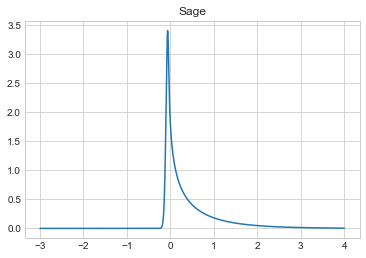

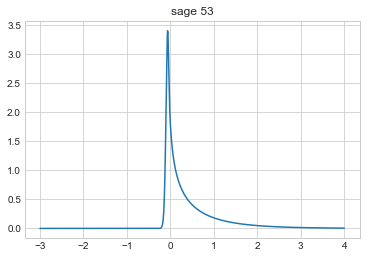

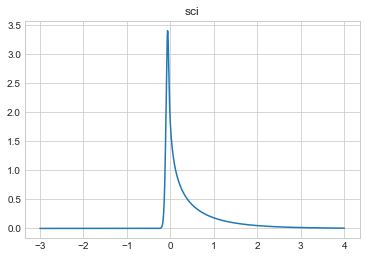

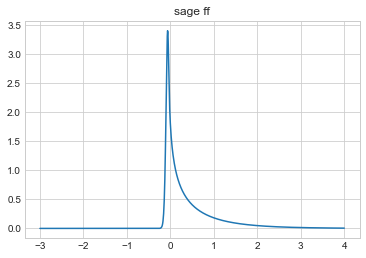

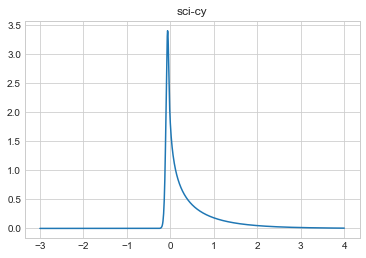

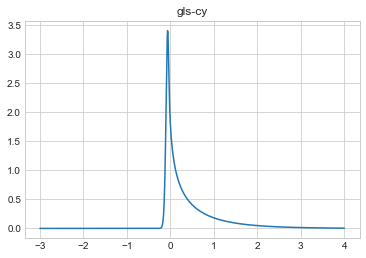

In [56]:
for method in list(pdf.keys()):
    yh = [pdf[method](u) for u in points]
    plt.plot(points,yh)
    plt.title(method)
    plt.show();

***
<a id=references></a>
# <font color=brown> References </font>
This notebook belongs to supplementary materials of the paper submitted to Journal of Statistical Computation and
Simulation and available at  <https://arxiv.org/abs/2105.04427>.
* Hančová, M., Gajdoš, A., Hanč, J. (2021). A practical, effective calculation of gamma difference distributions with open data science tools. arXiv:2105.04427 [cs, math, stat], https://arxiv.org/abs/2105.04427

### Abstract of the paper

At present, there is still no officially accepted and extensively verified implementation of computing the gamma difference distribution allowing unequal shape parameters. We explore four computational ways of the gamma difference distribution with the different shape parameters resulting from time series kriging, a forecasting approach based on the best linear unbiased prediction, and linear mixed models. The results of our numerical study, with emphasis on using open data science tools, demonstrate that our open tool implemented in high-performance Python(with Numba) is exponentially fast, highly accurate, and very reliable. It combines numerical inversion of the characteristic function and the trapezoidal rule with the double exponential oscillatory transformation (DE quadrature). At the double 53-bit precision, our tool outperformed the speed of the analytical computation based on Tricomi's $U(a, b, z)$ function in CAS software (commercial Mathematica, open SageMath) by 1.5-2 orders. At the precision of scientific numerical computational tools, it exceeded open SciPy, NumPy, and commercial MATLAB 5-10 times. The potential future application of our tool for a mixture of characteristic functions could open new possibilities for fast data analysis based on exact probability distributions in areas like multidimensional statistics, measurement uncertainty analysis in metrology as well as in financial mathematics and risk analysis. 